# Table of Content #

- [Importing Necessary Libraries](#Importing-Necessary-Libraries)
- [Importing Data and First Checks](#Importing-Data-and-First-Checks)

## Importing Necessary Libraries ##

In [1]:
#Importing libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

#Setting style
plt.style.use('fivethirtyeight')

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

#Setting display options
pd.set_option('display.max_columns', 5000)
pd.options.display.max_rows = 4000

## Importing Data and First Checks ##

In [2]:
#Reading data from csv
data = pd.read_csv('~/ga/projects/cstone/AUX/features_importance.csv')
data.columns = ['feature','coef']

#Our DataFrame
data.head(10)

,feature,coef
0,day_of_month,0.086396
1,day_of_week,0.226030
2,dep_hour,0.134846
3,op_carrier_fl_num,0.095160
4,month,0.028370
5,distance,0.109540
6,carrier_Delta,0.000099
7,carrier_SouthWest,0.000379
8,carrier_American,0.000055
9,carrier_United,0.000059


In [3]:
#Sorting data by coefficients
data.sort_values('coef', inplace=True, ascending=False)
data.head(20)

,feature,coef
1,day_of_week,0.226030
2,dep_hour,0.134846
5,distance,0.109540
3,op_carrier_fl_num,0.095160
0,day_of_month,0.086396
4,month,0.028370
25,origin_BOS,0.003299
48,origin_MCO,0.002888
60,origin_IAD,0.001115
27,dest_IAH,0.000902


## EDA ##

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


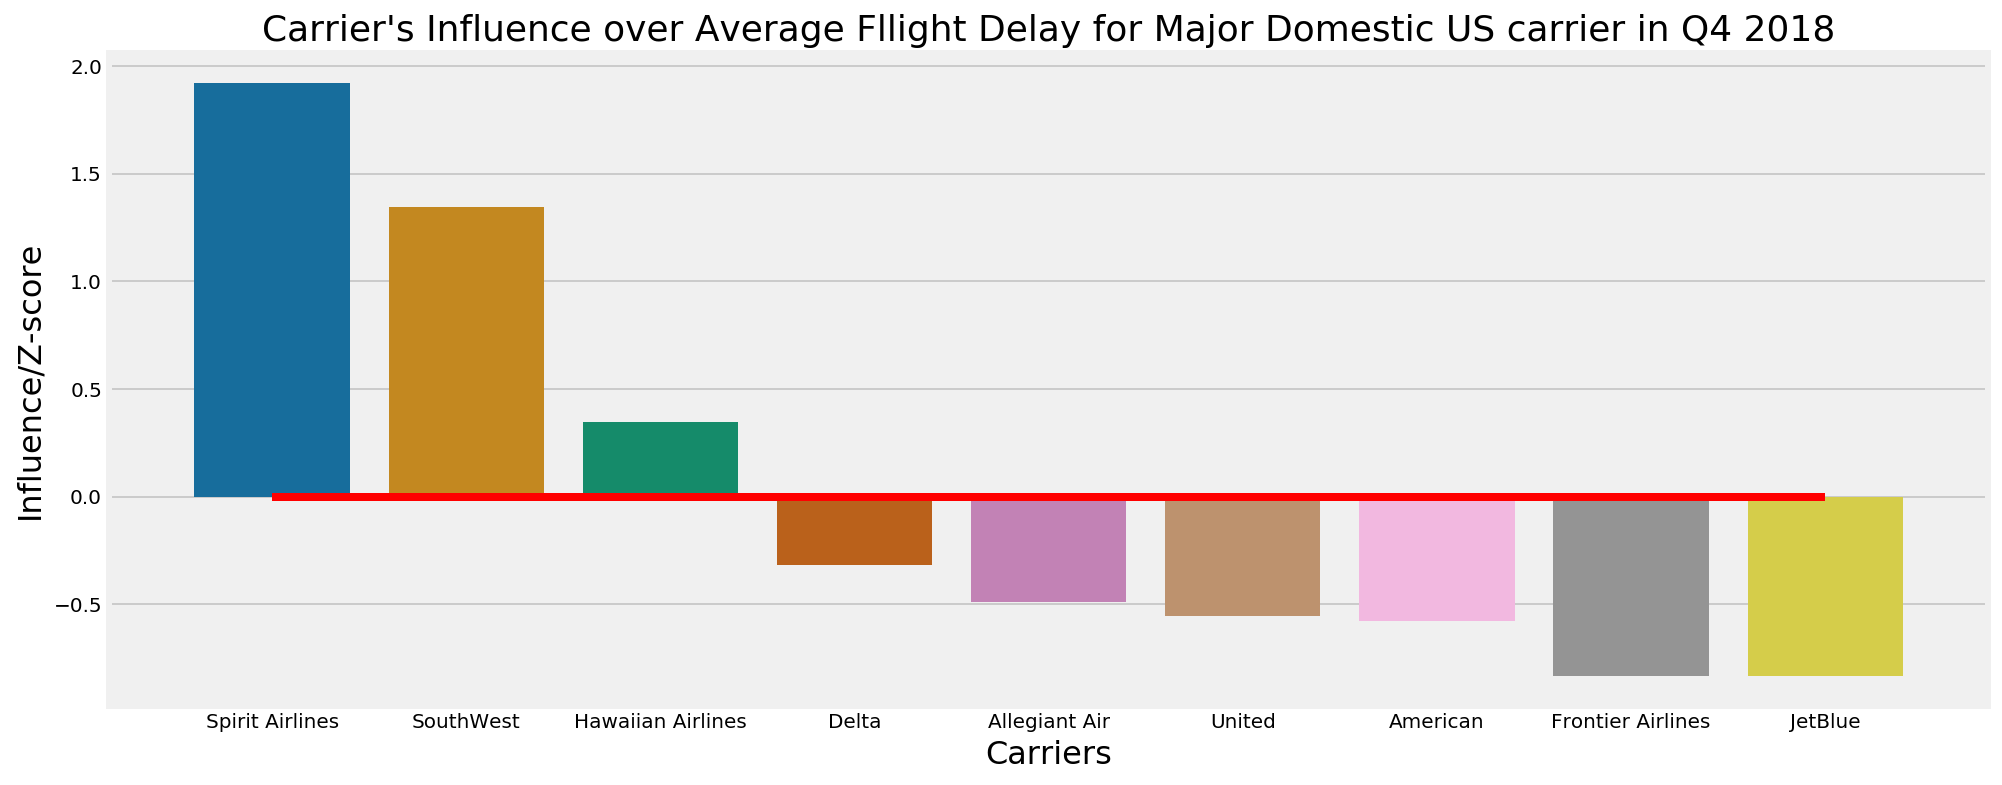

In [4]:
#Saving values into a separate DataFrame
influence_carrier = data[data['feature'].str.startswith('carrier')]

#Getting Z-scores
influence_carrier['norm'] = (data[data['feature'].str.startswith('carrier')]['coef'] - data[data['feature'].str.startswith('carrier')]['coef'].mean() )/data[data['feature'].str.startswith('carrier')]['coef'].std()

#Prepping for plotting
influence_carrier['feature']=influence_carrier['feature'].str.replace('carrier_','')

#Barchart of average delay by carriers
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(influence_carrier['feature']))
rank = influence_carrier['norm'].argsort().argsort()

sns.barplot(x=influence_carrier['feature'], y=influence_carrier['norm'], data=influence_carrier,
            label="", palette=np.array(pal[::-1])[rank]);

#Plotting a horizontal line for a "true delay" of 15 minutes cut-off
sns.lineplot(x=influence_carrier['feature'],y=0, color='red')

plt.title(label = "Carrier's Influence over Average Fllight Delay for Major Domestic US carrier in Q4 2018", fontsize=18);
plt.ylabel("Influence/Z-score", fontsize=16);
plt.xlabel("Carriers", fontsize=16);
#Saving plot into a png file
plt.savefig('carrier_average_delay_influence.png', transparent=True);

In [5]:
#Saving plot into a png file
plt.savefig('carrier_average_delay_influence.png', transparent=True);

<Figure size 432x288 with 0 Axes>

In [6]:
#Let's now look at the airport influencing delays most
origin_condition = data['feature'].str.startswith('origin')
destination_condition = data['feature'].str.startswith('dest')

#Saving these airports into a separate DataFrame
airports = data[origin_condition | destination_condition]

#Separate DataFrames for origins and destination
delay_origin = airports[airports['feature'].str.startswith('origin')]
delay_dest = airports[airports['feature'].str.startswith('dest')]

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


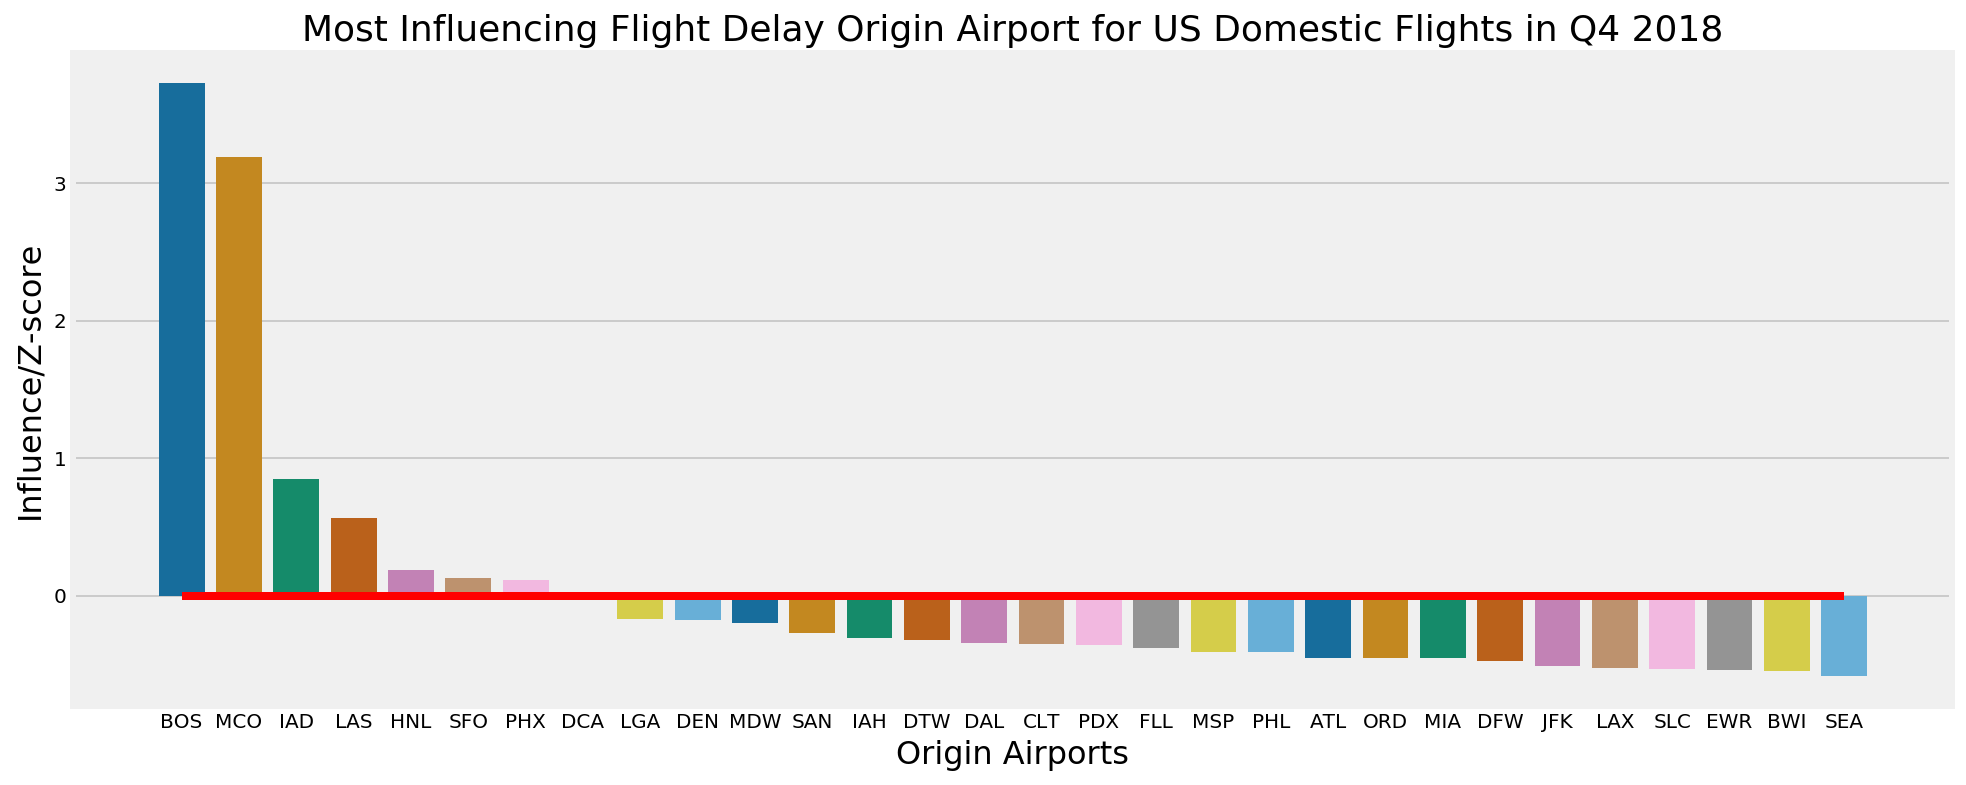

In [7]:
#Getting Z-scores
delay_origin['norm'] = (data[data['feature'].str.startswith('origin')]['coef'] - data[data['feature'].str.startswith('origin')]['coef'].mean() )/data[data['feature'].str.startswith('origin')]['coef'].std()

#Prepping for plotting
delay_origin['feature'] = delay_origin['feature'].str.replace('origin_','')

#Barchart of average delay by carriers
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(delay_origin['feature']))
rank = delay_origin['norm'].argsort().argsort()

sns.barplot(x=delay_origin['feature'], y=delay_origin['norm'], data=delay_origin,
            label="", palette=np.array(pal[::-1])[rank]);

#Plotting a horizontal line for a "true delay" of 15 minutes cut-off
sns.lineplot(x=delay_origin['feature'],y=0, color='red')

plt.title(label = "Most Influencing Flight Delay Origin Airport for US Domestic Flights in Q4 2018", fontsize=18);
plt.ylabel("Influence/Z-score", fontsize=16);
plt.xlabel("Origin Airports", fontsize=16);
#Saving plot into a png file
plt.savefig('average_delay_by_origin.png', transparent=True);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


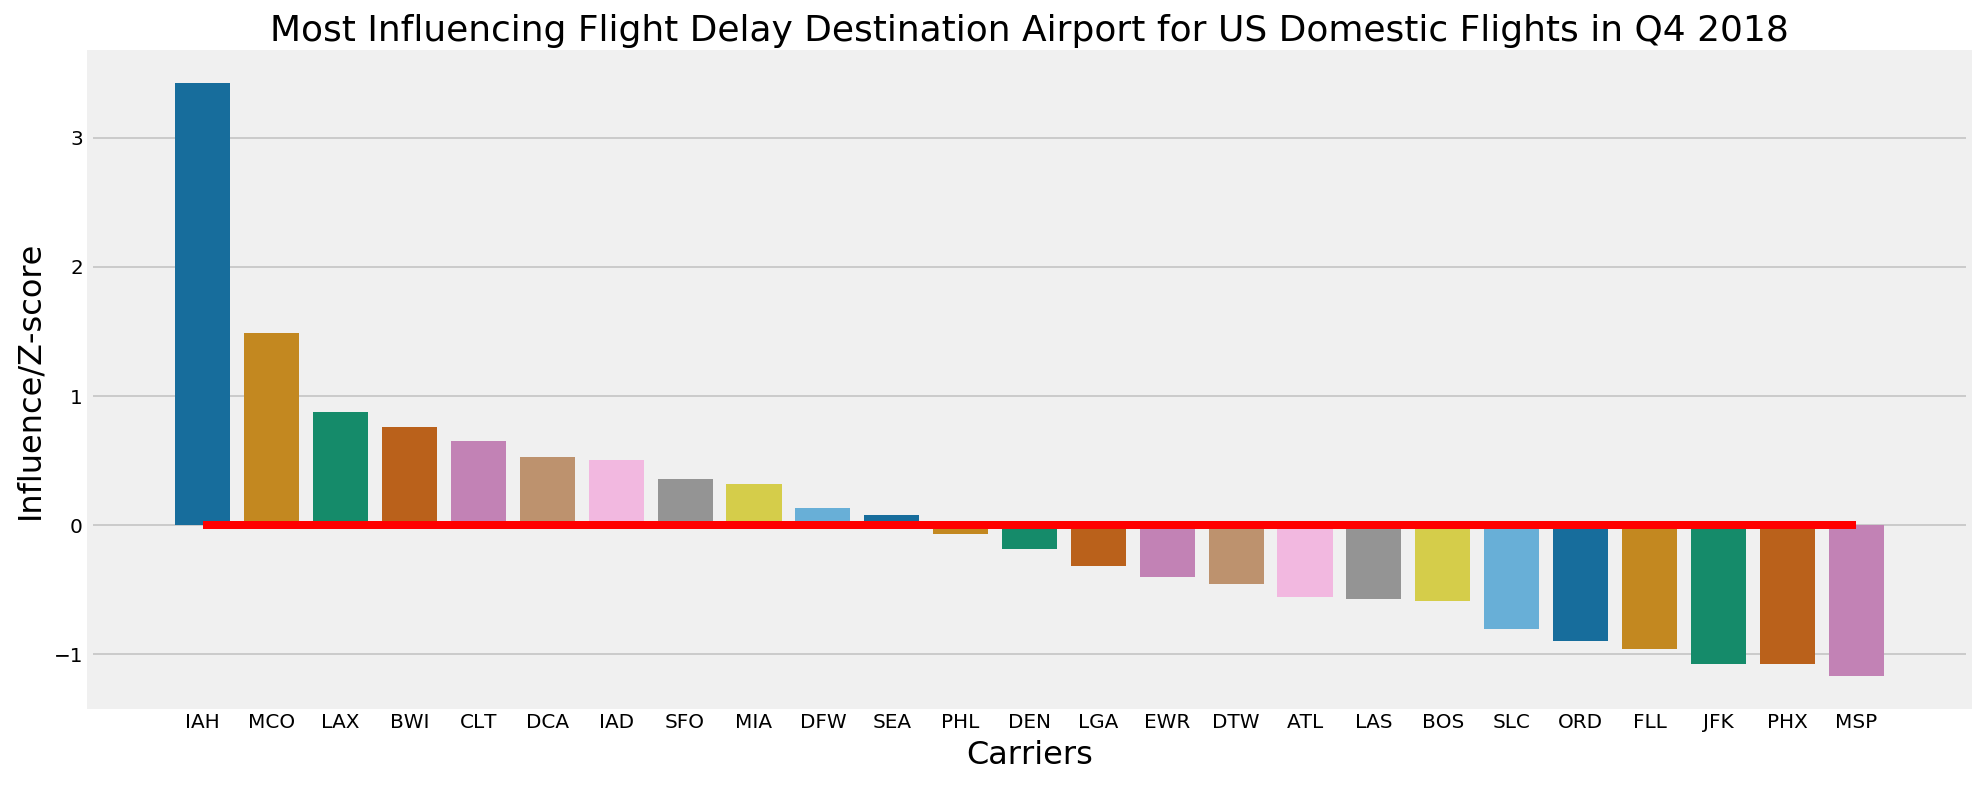

In [8]:
#Getting Z-scores
delay_dest['norm'] = (data[data['feature'].str.startswith('dest')]['coef'] - data[data['feature'].str.startswith('dest')]['coef'].mean() )/data[data['feature'].str.startswith('dest')]['coef'].std()

#Prepping for plotting
delay_dest['feature'] = delay_dest['feature'].str.replace('dest_','')

#Barchart of average delay by carriers
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(delay_dest['feature']))
rank = delay_dest['norm'].argsort().argsort()

sns.barplot(x=delay_dest['feature'], y=delay_dest['norm'], data=delay_dest,
            label="", palette=np.array(pal[::-1])[rank]);

#Plotting a horizontal line for a "true delay" of 15 minutes cut-off
sns.lineplot(x=delay_dest['feature'],y=0, color='red')

plt.title(label = "Most Influencing Flight Delay Destination Airport for US Domestic Flights in Q4 2018", fontsize=18);
plt.ylabel("Influence/Z-score", fontsize=16);
plt.xlabel("Carriers", fontsize=16);
#Saving plot into a png file
plt.savefig('average_delay_by_dest.png', transparent=True);

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


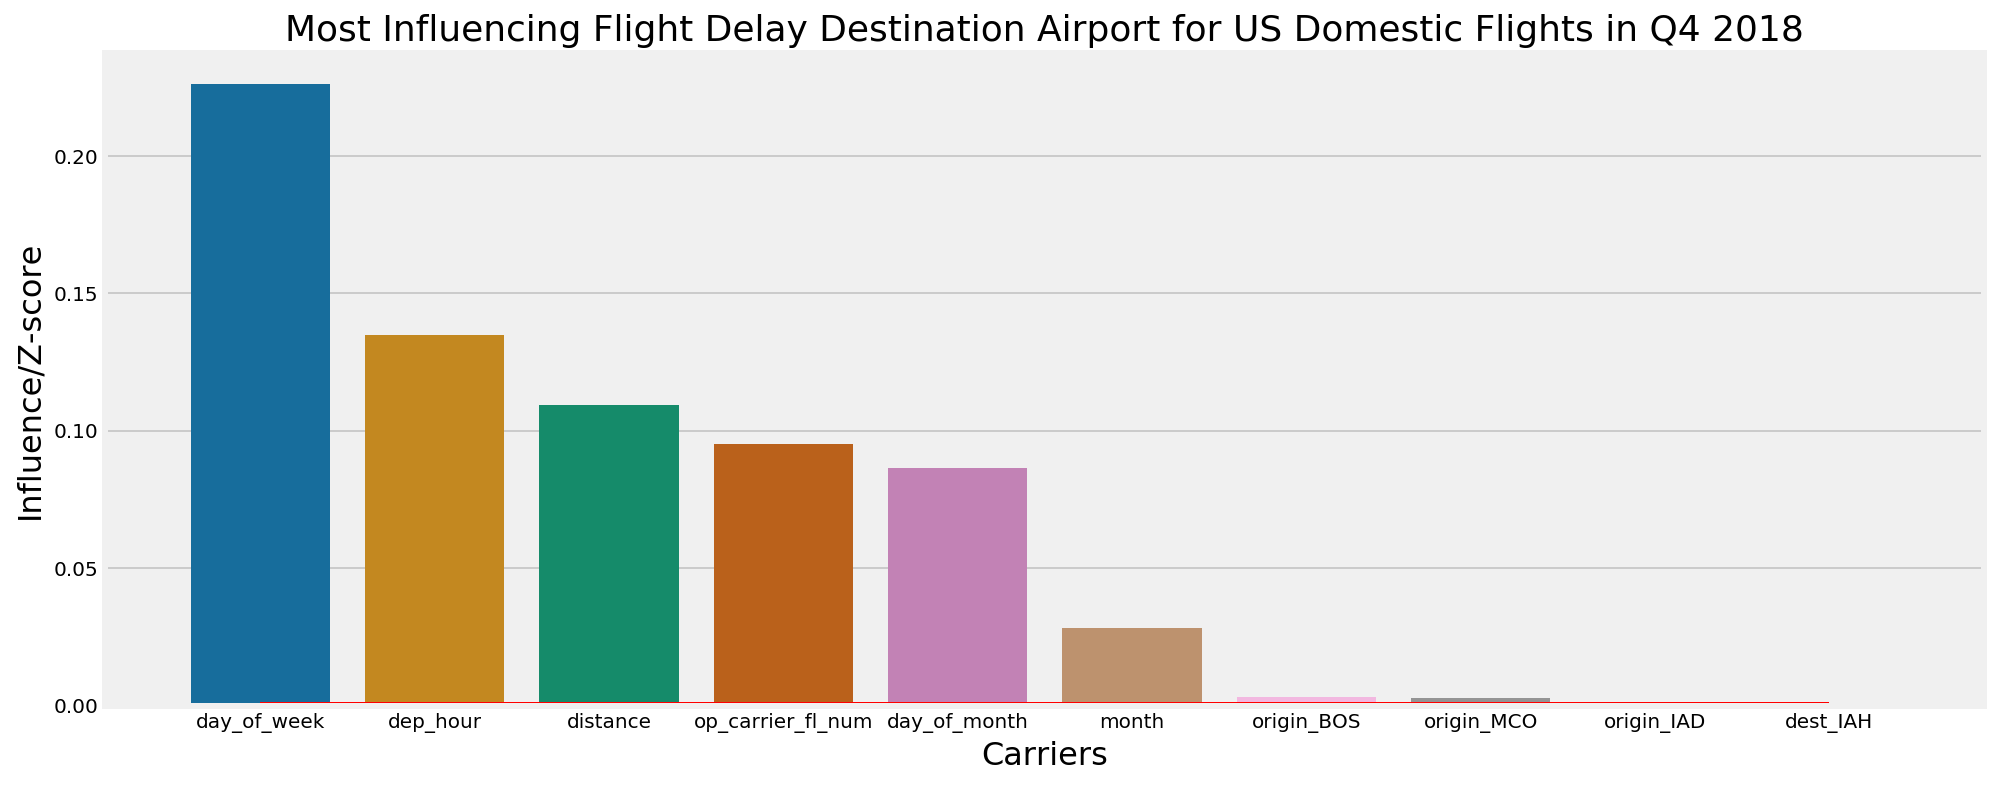

In [9]:
#Top 10 predictors
top_10 = data.head(10)

#Getting Z-scores
top_10['norm'] = top_10['coef']
# (top_10['coef'] - top_10['coef'].mean() )/top_10['coef'].std()

#Barchart of average delay by carriers
f, ax = plt.subplots(figsize=(15,6))

#Color coding is based on https://stackoverflow.com/questions/36271302/changing-color-scale-in-seaborn-bar-plot
sns.set_color_codes("colorblind")
pal = sns.color_palette("colorblind", len(top_10['feature']))
rank = top_10['norm'].argsort().argsort()

sns.barplot(x=top_10['feature'], y=top_10['norm'], data=top_10,
            label="", palette=np.array(pal[::-1])[rank]);

#Plotting a horizontal line for a "true delay" of 15 minutes cut-off
sns.lineplot(x=top_10['feature'],y=0, color='red')

plt.title(label = "Most Influencing Flight Delay Destination Airport for US Domestic Flights in Q4 2018", fontsize=18);
plt.ylabel("Influence/Z-score", fontsize=16);
plt.xlabel("Carriers", fontsize=16);
#Saving plot into a png file
plt.savefig('top_10_delay_indicators.png', transparent=True);

In [13]:
#Saving delay airports information to an Excel file for future use in Tableau
delay_origin['origin']=0
delay_dest['origin']=1
delay_merged = pd.concat([delay_origin,delay_dest], axis=0)
delay_merged.to_excel('delay_airports.xls')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
